In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.preprocessing import text, sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Activation, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import load_model

In [2]:
train_df = pd.read_csv('text_emotion.csv')
train_df.head()

,tweet_id,sentiment,author,content
0,1956967341,BoredomEmptyNeutral,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,SadnessWorry,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,SadnessWorry,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,EnthuFunSurpriseHappy,czareaquino,wants to hang out with friends SOON!
4,1956968416,BoredomEmptyNeutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [4]:
train_df.tail()

,tweet_id,sentiment,author,content
39952,1753903881,EnthuFunSurpriseHappy,catiams,@sharlynnx ME TOO! please come online *-* hope...
39953,1753903904,BoredomEmptyNeutral,Damir,"@balkanbeat No, a-ha is unfortunatelly from No..."
39954,1753903927,EnthuFunSurpriseHappy,yandrasap,today was interesting...
39955,1753903951,BoredomEmptyNeutral,AprilLouiseeee,has just got out the shower
39956,1753903987,SadnessWorry,nadszy,How Do You Sleep - Jesse McCartney


In [5]:
print(len(train_df))
print(type(train_df))
print(train_df.ndim)
print(train_df.shape)
print(train_df.dtypes)
print(train_df.size)

39957
<class 'pandas.core.frame.DataFrame'>
2
(39957, 4)
tweet_id      int64
sentiment    object
author       object
content      object
dtype: object
159828


In [3]:
train_df = train_df.drop(['tweet_id', 'author'], axis=1)

In [7]:
train_df.head()

,sentiment,content
0,BoredomEmptyNeutral,@tiffanylue i know i was listenin to bad habi...
1,SadnessWorry,Layin n bed with a headache ughhhh...waitin o...
2,SadnessWorry,Funeral ceremony...gloomy friday...
3,EnthuFunSurpriseHappy,wants to hang out with friends SOON!
4,BoredomEmptyNeutral,@dannycastillo We want to trade with someone w...


In [8]:
train_df.shape

(39957, 2)

In [4]:
train_df['sentiment'].value_counts()

SadnessWorry             13622
EnthuFunSurpriseHappy     9909
BoredomEmptyNeutral       9634
ReliefLove                5359
AngerFearHate             1433
Name: sentiment, dtype: int64

In [5]:
train_df['sentiment'].value_counts().plot.bar()

In [6]:
train_df['sentiment'].value_counts() / len(train_df)

SadnessWorry             0.340916
EnthuFunSurpriseHappy    0.247992
BoredomEmptyNeutral      0.241109
ReliefLove               0.134119
AngerFearHate            0.035864
Name: sentiment, dtype: float64

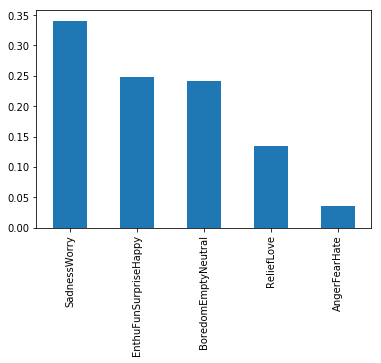

In [12]:
(train_df['sentiment'].value_counts() / len(train_df)).plot.bar()

SadnessWorry             13622
EnthuFunSurpriseHappy     9909
BoredomEmptyNeutral       9634
ReliefLove                5359
AngerFearHate             1433
Name: sentiment, dtype: int64


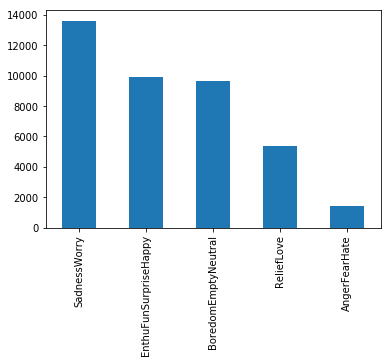

In [13]:
# train_df = pd.concat(train_df)
print(train_df['sentiment'].value_counts())
train_df['sentiment'].value_counts().plot.bar()

In [14]:
train_df.head()

,sentiment,content
0,BoredomEmptyNeutral,@tiffanylue i know i was listenin to bad habi...
1,SadnessWorry,Layin n bed with a headache ughhhh...waitin o...
2,SadnessWorry,Funeral ceremony...gloomy friday...
3,EnthuFunSurpriseHappy,wants to hang out with friends SOON!
4,BoredomEmptyNeutral,@dannycastillo We want to trade with someone w...


In [15]:
np.where(pd.isnull(train_df))

(array([], dtype=int64), array([], dtype=int64))

In [7]:
print(train_df.head())
train_df = train_df.sample(frac=1).reset_index(drop=True)
print(len(train_df))
train_df.head()

               sentiment                                            content
0    BoredomEmptyNeutral  @tiffanylue i know  i was listenin to bad habi...
1           SadnessWorry  Layin n bed with a headache  ughhhh...waitin o...
2           SadnessWorry                Funeral ceremony...gloomy friday...
3  EnthuFunSurpriseHappy               wants to hang out with friends SOON!
4    BoredomEmptyNeutral  @dannycastillo We want to trade with someone w...
39957


,sentiment,content
0,EnthuFunSurpriseHappy,@dwsomers samee well i aint a man i am a girl ...
1,BoredomEmptyNeutral,@gracetanglefoot what? You won't be two blocks...
2,EnthuFunSurpriseHappy,"All the bike chat, makes me think we should si..."
3,BoredomEmptyNeutral,has no people skills.
4,BoredomEmptyNeutral,walked home in the rain.


In [9]:
y_pandas_df = pd.get_dummies(train_df['sentiment'])
print(type(y_pandas_df))
print(y_pandas_df.shape)
print(y_pandas_df.ndim)
y_pandas_df.head()

<class 'pandas.core.frame.DataFrame'>
(39957, 5)
2


,AngerFearHate,BoredomEmptyNeutral,EnthuFunSurpriseHappy,ReliefLove,SadnessWorry
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [11]:
y = y_pandas_df.values
print("properties of y")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(y), y.ndim, y.shape, y.size, y.dtype, y.itemsize))

properties of y
type : <class 'numpy.ndarray'>, dimensions : 2, shape : (39957, 5), total no. of elements : 199785, data type of each element: uint8, size of each element 1 bytes


In [19]:
train_df.shape

(39957, 2)

In [12]:
train_df = train_df.drop(['sentiment'], axis=1)

In [13]:
train_df.shape
x = train_df.values.flatten()

In [22]:
print(x)
print("properties of x")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(x), x.ndim, x.shape, x.size, x.dtype, x.itemsize))

["trying to straighten my hair, but it's too effing hot in here. also, i need food"
 'Watching Die Hard 2. I &lt;333 Jeremy Irons'
 'Heading home after a long week. Wish someone onther than marketers would follow me'
 ... '@Mennard You are very sweet, my everyday hero friend'
 "@willameda I really really hope that doesn't happen."
 'I gots the sniffles']
properties of x
type : <class 'numpy.ndarray'>, dimensions : 1, shape : (39957,), total no. of elements : 39957, data type of each element: object, size of each element 8 bytes


In [14]:
list_of_classes = ['disgust', 'neutral', 'ecstacy', 'love', 'sad' ]
max_features = 20000
max_text_length = 400
embedding_dims = 50
batch_size = 30
epochs = 3
num_filters_1 = 250
num_filters_2 = 250
filter_size = 3

In [15]:
x_tokenizer = text.Tokenizer(num_words=max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

In [25]:
'''
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=max_text_length))
model.add(Dropout(0.2))

model.add(Conv1D(filters=num_filters_1, kernel_size=filter_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_filters_2))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('sigmoid'))
'''

"\nmodel = Sequential()\n\nmodel.add(Embedding(max_features, embedding_dims, input_length=max_text_length))\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv1D(filters=num_filters_1, kernel_size=filter_size, padding='valid', activation='relu', strides=1))\nmodel.add(GlobalMaxPooling1D())\n\nmodel.add(Dense(num_filters_2))\nmodel.add(Dropout(0.2))\nmodel.add(Activation('relu'))\n\nmodel.add(Dense(5))\nmodel.add(Activation('sigmoid'))\n"

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [27]:
model.fit(x_train_val, y, batch_size=batch_size, epochs=10)

In [28]:
model.save('text_emotion_model.h5')

In [23]:
lists = [input()]
model2 = load_model('text_emotion_model.h5')
x_test = np.array(lists)
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)
y_testing = model2.predict(x_testing, verbose = 1)
y_testing = y_testing
print(y_testing)
list1 = y_testing[0]
ind = 0
list1 = list1.tolist()
maxy = max(list1)
ind = list1.index(maxy)
emotion = list_of_classes[ind]
print(list1,"  ",maxy," mood :",emotion)
lyricsFile = open("lyrics.txt","w+")
lyricsFile.write(lists[0])
lyricsFile.close()


if emotion=="neutral" or emotion=="love":
    emotion="sad"
elif emotion=="disgust":
    emotion="ecstacy"

emotionFile = open("emotionFile.txt","w+")
emotionFile.write(emotion)
emotionFile.close()

My heart is beating, keeps on repeating I am waiting for you) - 2 My love encloses, a plot of roses, And when shall be then, our next meeting, 'Cos love (extended) you know, That time is fleeting,
1/1 [==============================] - 0s 96ms/sample
[[0.00429952 0.03662789 0.52241176 0.15305868 0.3597899 ]]
[0.004299521446228027, 0.036627888679504395, 0.5224117636680603, 0.15305867791175842, 0.3597899079322815]    0.5224117636680603  mood : ecstacy
